In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
%matplotlib inline

In [2]:
cash = 120000

In [3]:
df = pd.read_csv('/home/tomek/ib_tools/backtests/backtest_2020-06-29_09-32_20180601_20191231.csv')
del df['sys_time']
del df['exec_ids']
try:
    del df['perm_id']
    del df['com_reports']
except:
    pass
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])

In [30]:
df.head(50)

,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,
2018-06-01 03:18:00,GC,SELL,6,1302.20,1,ENTRY,14.52,0.00,120000.00
2018-06-01 14:38:30,GC,BUY,6,1296.90,2,STOP-LOSS,14.52,3150.96,123150.96
2018-06-01 15:35:30,NQ,BUY,5,7029.50,3,ENTRY,10.50,0.00,123150.96
2018-06-01 16:16:30,NQ,SELL,5,7022.75,4,STOP-LOSS,10.50,-696.00,122454.96
2018-06-01 16:22:00,NQ,BUY,5,7053.25,5,ENTRY,10.50,0.00,122454.96
2018-06-01 19:22:00,ES,BUY,5,2735.00,7,ENTRY,10.50,0.00,122454.96
2018-06-01 20:10:00,NQ,SELL,5,7072.75,6,STOP-LOSS,10.50,1929.00,124383.96
2018-06-01 21:50:30,NQ,BUY,5,7086.25,9,ENTRY,10.50,0.00,124383.96
2018-06-04 08:28:00,YM JUN,BUY,5,24688.00,11,ENTRY,10.50,0.00,124383.96


In [4]:
#df['contract'] = df.contract.str.replace('YM   JUN','YM')
#df['contract'] = df.contract.str.strip()

In [5]:
#df = df[(df['contract'] == 'NQ') | (df['contract'] == 'ES') | (df['contract'] == 'YM')]

In [6]:
#df = df.loc['20190101':'20190701']

In [7]:
c = set(df['contract'])
allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
#allocs = pd.Series([1/3, 2/3, 1], index=['ES','NQ', 'total'])

In [8]:
allocs

YM   JUN     0.25
ES           0.25
GC           0.25
NQ           0.25
total        1.00
dtype: float64

In [9]:
df.groupby('contract').realizedPNL.sum()

contract
ES           277022.1
GC            34593.6
NQ           420767.2
YM   JUN     302974.6
Name: realizedPNL, dtype: float64

In [10]:
df.realizedPNL.sum()

1035357.5

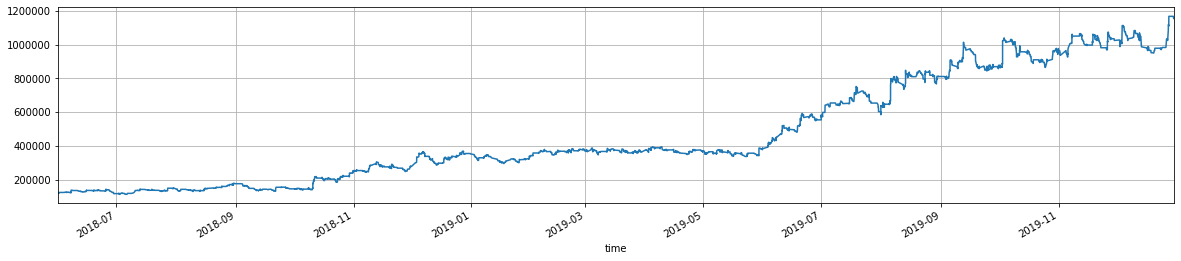

In [11]:
df.cash.plot(figsize=(20,4), grid=True);

In [12]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [13]:
# monthly average number of transactions
by_contract.resample('B').count().resample('M').mean()

contract,ES,GC,NQ,YM JUN,total
time,,,,,
2018-06-30,0.666667,2.666667,4.380952,1.428571,9.142857
2018-07-31,0.590909,2.818182,2.727273,0.818182,6.954545
2018-08-31,0.478261,3.173913,3.130435,1.130435,7.913043
2018-09-30,0.700000,3.000000,4.000000,1.100000,8.750000
2018-10-31,1.565217,2.826087,7.043478,2.521739,13.782609
2018-11-30,0.954545,2.181818,6.136364,1.409091,10.681818
2018-12-31,1.571429,2.285714,6.714286,2.476190,12.952381
2019-01-31,0.826087,2.000000,4.521739,1.521739,8.826087
2019-02-28,0.550000,1.850000,3.600000,1.300000,7.250000


In [14]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES            344
 GC           1208
 NQ           1892
 YM   JUN      612
 Name: action, dtype: int64, 4056)

In [15]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES           0.834951
 GC           2.932039
 NQ           4.592233
 YM   JUN     1.485437
 Name: action, dtype: float64, 9.844660194174757)

In [16]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES            8765.4
GC           42156.4
NQ           47497.8
YM   JUN     16115.4
Name: commission, dtype: float64

In [17]:
df.commission.sum()

114535.00000000001

In [18]:
# per trade stats
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss','win_ratio', 'EV',
                               'number_of_positions'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    row['average_PNL'] = round(d.realizedPNL.mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0]).realizedPNL.mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0]).realizedPNL.mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_positions'] = d.realizedPNL.count()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV,number_of_positions
GC,0.36,57.27,7129.03,-3965.36,1.80,28.62,604.0
NQ,0.41,444.79,5267.88,-2865.18,1.84,469.37,946.0
YM JUN,0.41,990.11,9364.11,-4715.25,1.99,1057.29,306.0
ES,0.45,1610.59,11388.42,-6314.59,1.80,1651.76,172.0
total,0.40,510.53,6990.62,-3754.78,1.86,543.38,2028.0


In [19]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [20]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,GC,NQ,YM JUN,total
ES,1.000000,-0.074697,0.127817,0.406240,0.534614
GC,-0.074697,1.000000,0.016615,0.090108,0.442351
NQ,0.127817,0.016615,1.000000,0.226265,0.554420
YM JUN,0.406240,0.090108,0.226265,1.000000,0.685964
total,0.534614,0.442351,0.554420,0.685964,1.000000


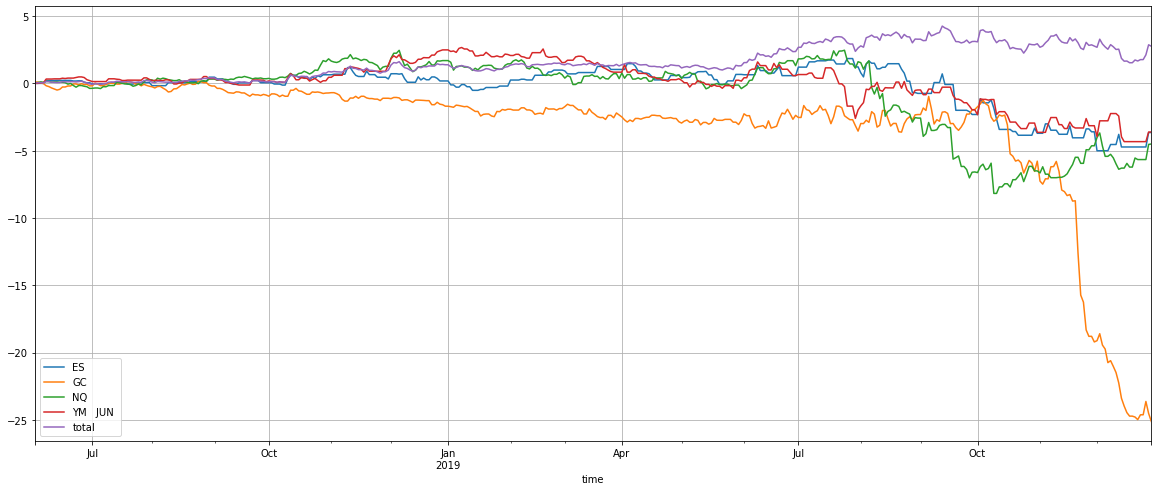

In [21]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

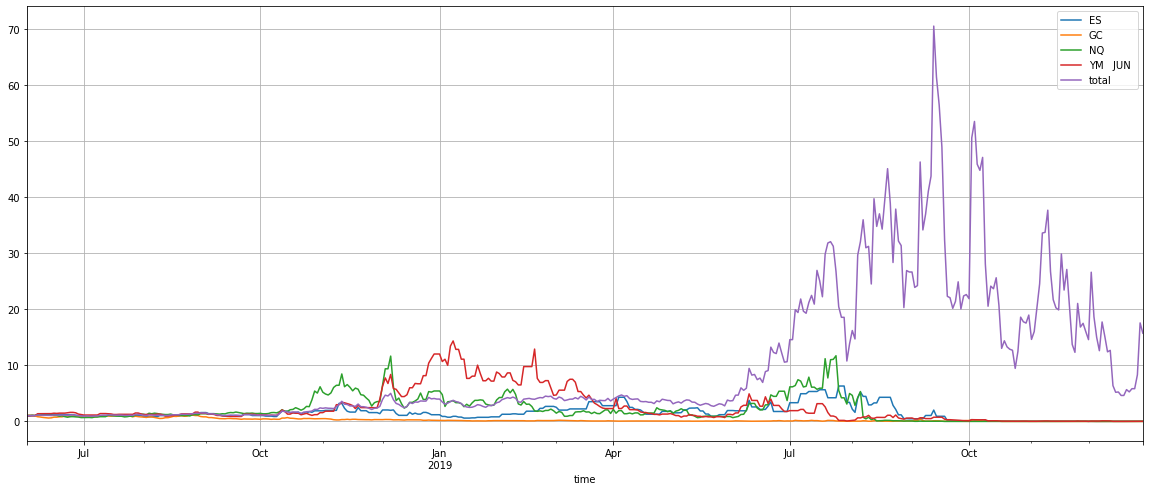

In [22]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [23]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,GC,NQ,YM JUN,total
Annual return,-0.892997,-1.000000,-0.936360,-0.890482,4.401222
Cumulative returns,-0.974109,-1.000000,-0.988929,-0.973107,14.760369
Annual volatility,4.406935,5.341831,4.667581,4.617944,2.951004
Sharpe ratio,1.281622,0.132035,1.837943,1.337641,1.788309
Calmar ratio,-0.893944,-1.000000,-0.936383,-0.891299,4.710661
Stability,0.269057,0.402158,0.424828,0.365286,0.797462
Max drawdown,-0.998941,-1.000000,-0.999976,-0.999084,-0.934311
Omega ratio,1.484154,1.028814,1.481310,1.417496,1.483989
Sortino ratio,2.765301,0.229066,3.341980,2.915736,3.813826
Skew,3.157104,1.785902,1.567692,3.143875,2.510093


In [24]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,GC,NQ,YM JUN,total
time,,,,,
2018-06-30,4.15,-16.89,-31.17,22.50,-3.90
2018-07-31,2.04,-2.86,89.13,9.71,24.60
2018-08-31,48.99,1.74,5.73,7.21,25.35
2018-09-30,-33.67,-48.90,2.54,-21.25,-25.19
2018-10-31,80.38,16.77,338.72,38.36,115.52
2018-11-30,-26.72,-32.45,-42.75,153.63,10.93
2018-12-31,-13.73,-44.59,53.43,202.34,48.68
2019-01-31,-31.68,-20.13,-21.51,-29.01,-13.18
2019-02-28,228.24,5.03,-55.36,-45.49,18.40


In [25]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES            -97.0
GC           -100.0
NQ            -99.0
YM   JUN      -97.0
total        1476.0
dtype: float64

In [26]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2019-10-02 20:45:30,YM JUN,BUY,26063.00,67117.6
2019-10-02 21:00:00,ES,BUY,2893.75,66416.0
2019-12-27 15:12:00,NQ,SELL,8829.25,62417.2
2019-12-27 21:50:30,ES,SELL,3235.50,57707.5
2019-12-03 18:22:00,YM JUN,BUY,27414.00,55277.2
...,...,...,...,...
2019-08-28 16:42:00,ES,BUY,2877.50,-17125.5
2019-12-12 14:03:00,YM JUN,SELL,27873.00,-17628.6
2019-11-19 16:04:00,ES,SELL,3118.75,-17701.2


In [27]:
daily.sort_values('total', ascending=False)

,ES,GC,NQ,YM JUN,total
time,,,,,
2019-10-02,2.213867,0.231471,0.559300,2.237253,1.310473
2019-12-27,1.923583,-0.587971,2.080573,1.041413,1.114400
2019-08-05,1.590540,0.286139,0.486807,1.701760,1.016311
2019-09-05,0.000000,1.833804,1.289820,0.516293,0.909979
2019-12-03,0.000000,0.676976,0.397533,2.223147,0.824414
...,...,...,...,...,...
2019-08-28,-0.570850,-0.212409,-0.446300,-0.180907,-0.352616
2019-10-17,0.000000,-0.883315,-0.215747,-0.388080,-0.371785
2019-10-09,-0.457940,-0.262388,-0.894373,0.000000,-0.403675
